# 저출산율에 관한 해결방안 분석

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy as hc
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import numpy as np
import folium

In [2]:
from matplotlib import font_manager as fm
nanum_font_path = '/Library/Fonts/NanumGothic.ttf'

fm.fontManager.addfont(nanum_font_path)
nanum_font = fm.FontProperties(fname=nanum_font_path).get_name()

plt.rcParams['font.family'] = nanum_font
plt.rcParams['axes.unicode_minus'] = False  

In [3]:
country_df = pd.read_csv("./data/countries.csv", encoding="utf-8")

In [4]:
def South_Korea(df,label):
    return df[df['country'].str.contains('South Korea')][['country',label]]

In [5]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    float64
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    float64
 10  region_1    167 non-null    object 
 11  region_2    66 non-null     object 
 12  continent   167 non-null    object 
 13  latitude    167 non-null    float64
 14  longitude   167 non-null    float64
dtypes: float64(11), object(4)
memory usage: 19.7+ KB


In [6]:
country_df.corr(numeric_only=True)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,latitude,longitude
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032,-0.378272,-0.029789
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725,0.178595,0.132545
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966,0.199959,-0.213919
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498,0.073715,0.031059
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571,0.356402,0.060901
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631,-0.143453,0.095680
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089,0.444758,-0.032754
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910,-0.460482,-0.034355
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000,0.400823,-0.002808
latitude,-0.378272,0.178595,0.199959,0.073715,0.356402,-0.143453,0.444758,-0.460482,0.400823,1.000000,0.066513


# child_mort과, total_fer, life_expec을 기준으로 군집화

In [7]:
country_df[["child_mort","total_fer","life_expec"]].corr()

,child_mort,total_fer,life_expec
child_mort,1.000000,0.848478,-0.886676
total_fer,0.848478,1.000000,-0.760875
life_expec,-0.886676,-0.760875,1.000000


<Axes: >

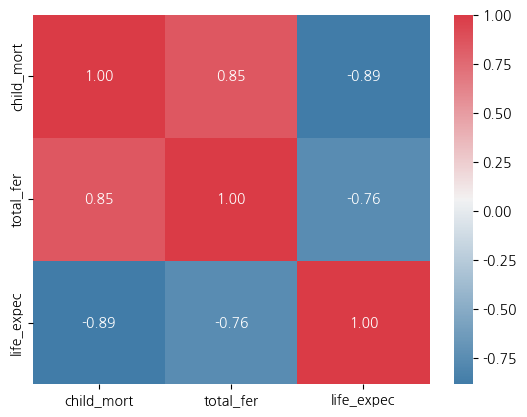

In [8]:
cmap = sns.diverging_palette(240, 10, n = 9, as_cmap = True)
sns.heatmap(
    country_df[["child_mort","total_fer","life_expec"]].corr(),
    annot = True,
    fmt = ".2f",
    cmap = cmap)

In [9]:
country_df[["child_mort","total_fer","life_expec","income","gdpp"]].corr()

,child_mort,total_fer,life_expec,income,gdpp
child_mort,1.000000,0.848478,-0.886676,-0.524315,-0.483032
total_fer,0.848478,1.000000,-0.760875,-0.501840,-0.454910
life_expec,-0.886676,-0.760875,1.000000,0.611962,0.600089
income,-0.524315,-0.501840,0.611962,1.000000,0.895571
gdpp,-0.483032,-0.454910,0.600089,0.895571,1.000000


<Axes: >

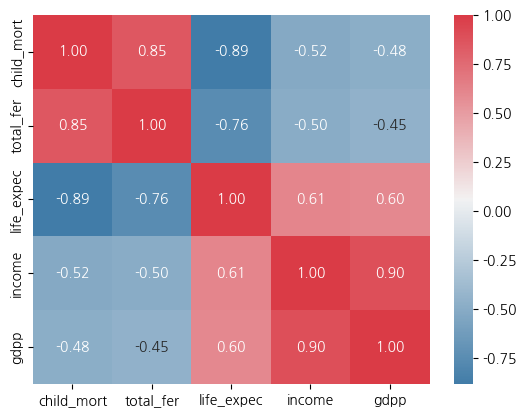

In [10]:
cmap = sns.diverging_palette(240, 10, n = 9, as_cmap = True)
sns.heatmap(
    country_df[["child_mort","total_fer","life_expec","income","gdpp"]].corr(),
    annot = True,
    fmt = ".2f",
    cmap = cmap)

Text(0.5, 1.0, 'child_mort와 total_fer의 상관관계')

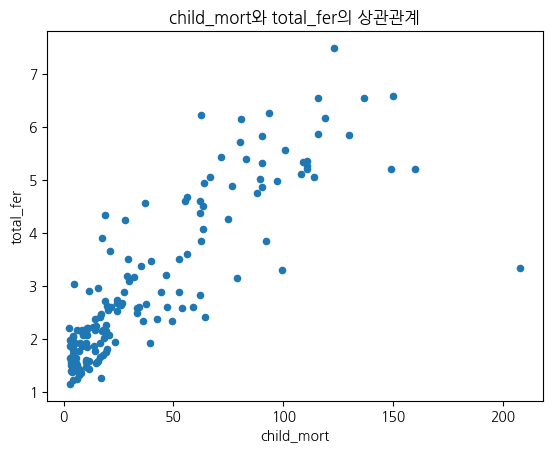

In [11]:
country_df.plot(
    kind="scatter",
    x="child_mort",
    y="total_fer")
plt.title("child_mort와 total_fer의 상관관계")

Text(0.5, 1.0, 'child_mort와 life_expec의 상관관계')

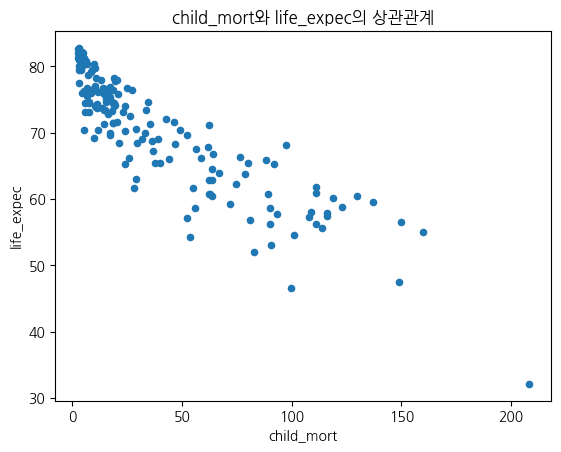

In [12]:
country_df.plot(
    kind="scatter",
    x="child_mort",
    y="life_expec")
plt.title("child_mort와 life_expec의 상관관계")

Text(0.5, 1.0, 'total_fer과 life_expec의 상관관계')

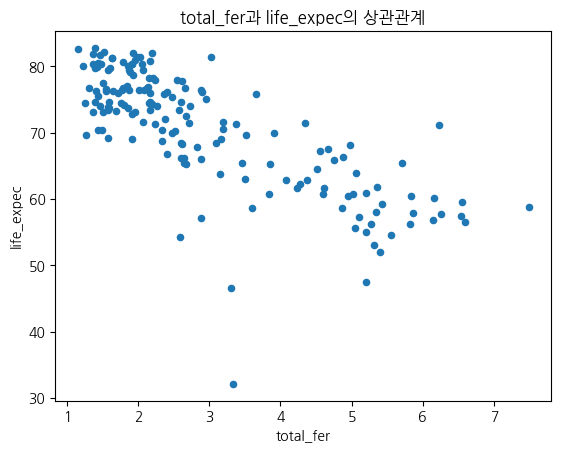

In [13]:
country_df.plot(
    kind="scatter",
    x="total_fer",
    y="life_expec")
plt.title("total_fer과 life_expec의 상관관계")

In [14]:
child_col = country_df[["child_mort","total_fer","life_expec"]].reset_index(drop=True)

Text(0.5, 1.0, 'child_mort, total_fer, life_expec기준 dendrogram')

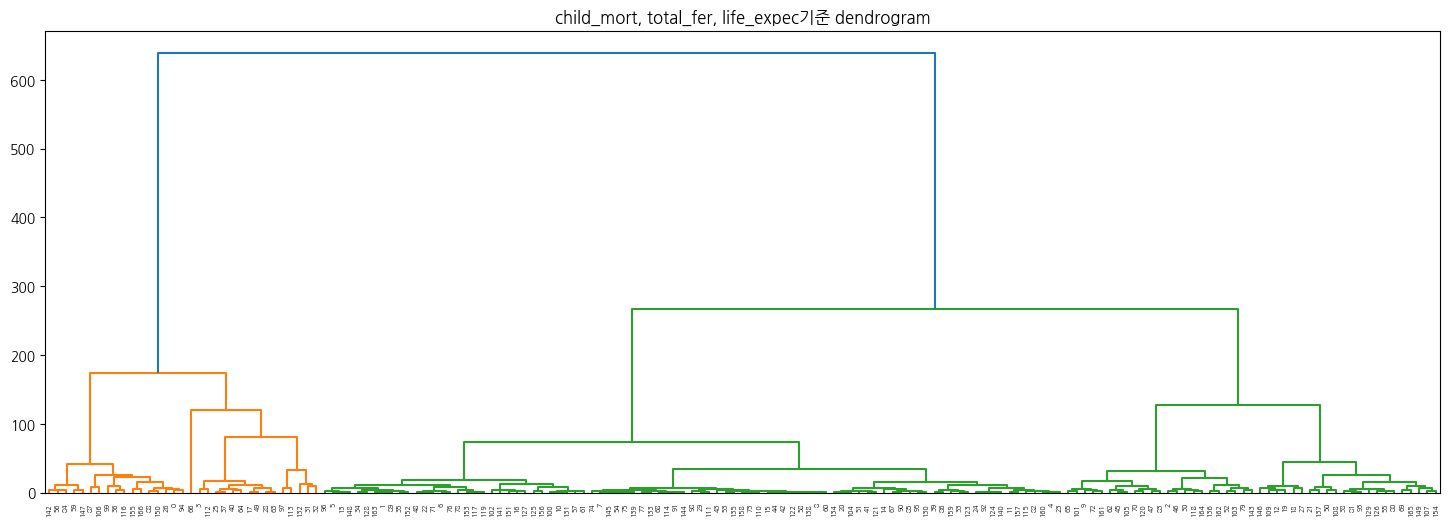

In [15]:
plt.figure(figsize=(18,6))
_=hc.dendrogram(
    hc.linkage(child_col, method="ward"))
plt.title("child_mort, total_fer, life_expec기준 dendrogram")

In [16]:
silhouette_scores = []
for i in range(2, 8):
    silhouette_scores.append(
        silhouette_score(child_col, AgglomerativeClustering(n_clusters = i).fit_predict(child_col)))

Text(0, 0.5, '실루엣 계수')

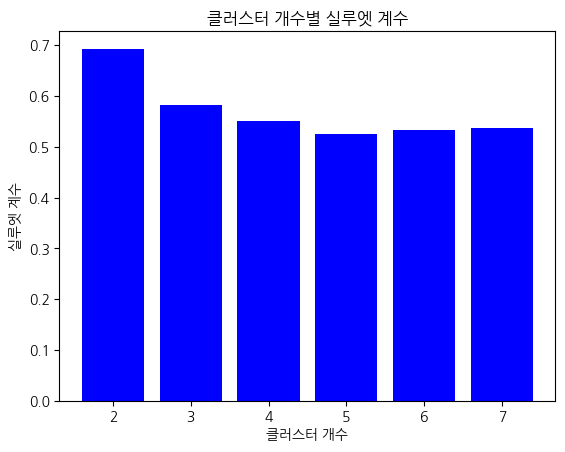

In [17]:
plt.bar(range(2,8), silhouette_scores, color="blue")
plt.title("클러스터 개수별 실루엣 계수")
plt.xlabel("클러스터 개수")
plt.ylabel("실루엣 계수")

In [18]:
model = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage ="ward")
country_df["label_child"] = model.fit_predict(child_col)

/var/folders/yd/plqzt5cj0m5blbgycq9b7d_40000gn/T/ipykernel_5145/1062918170.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


Text(0.5, 1.0, 'label_child별 total_fer')

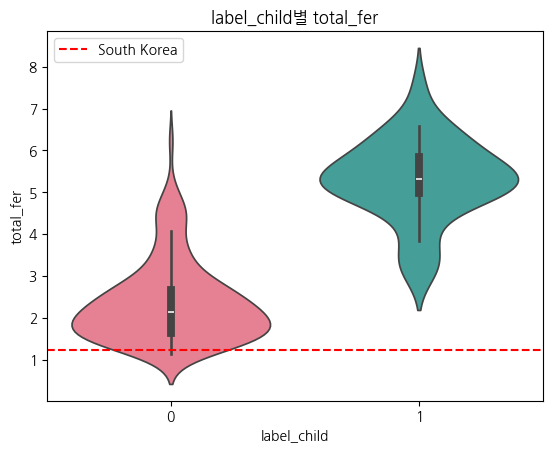

In [19]:
unique_labels = country_df["label_child"].unique()
palette = sns.color_palette("husl", len(unique_labels))
sns.violinplot(
    x = "label_child",
    y = "total_fer",
    data = country_df,
    palette = palette)
plt.axhline(1.23, color = "red", linestyle = "--", label = "South Korea")
plt.legend()
plt.title("label_child별 total_fer")

In [20]:
country_df.groupby('label_child')[['total_fer']].describe()

total_fer                                                   
                count      mean       std   min   25%    50%   75%   max
label_child                                                             
0               134.0  2.369254  0.963958  1.15  1.63  2.145  2.67  6.23
1                33.0  5.297879  0.963972  3.15  4.98  5.310  5.84  7.49

#### 현재 연령별 출산율이 유지 된다고 가정했을 때 각 여성 당 출산될 아이의 수
label_baby0의 경우 평균 2.3명

label_baby1의 경우 평균 5.2명으로 확인됨

/var/folders/yd/plqzt5cj0m5blbgycq9b7d_40000gn/T/ipykernel_5145/2131915831.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


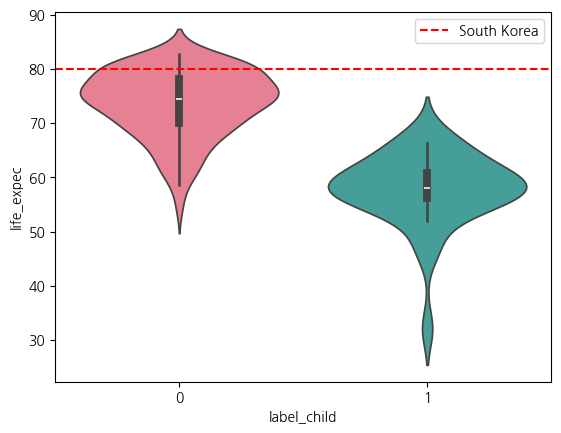

In [21]:
unique_labels = country_df["label_child"].unique()
palette = sns.color_palette("husl", len(unique_labels))
sns.violinplot(
    x = "label_child",
    y = "life_expec",
    data = country_df,
    palette = palette)
plt.axhline(80.1, color = "red", linestyle = "--", label = "South Korea")
plt.legend()

In [22]:
country_df.groupby('label_child')['life_expec'].describe()

,count,mean,std,min,25%,50%,75%,max
label_child,,,,,,,,
0,134.0,73.691791,6.135537,54.3,70.0,74.55,78.2,82.8
1,33.0,57.821212,6.737292,32.1,56.2,58.00,60.9,68.2


#### 현재 사망률이 유지된다고 했을 때 신생아의 평균 수명
label_baby0의 경우 평균 54세, 50%가 74.55세 이하이었고 많았고

label_baby1의 경우 평균 32.1세, 50%가 58세 이하였다.

In [23]:
South_Korea(country_df, "child_mort")

,country,child_mort
138,South Korea,4.1


/var/folders/yd/plqzt5cj0m5blbgycq9b7d_40000gn/T/ipykernel_5145/2640131054.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


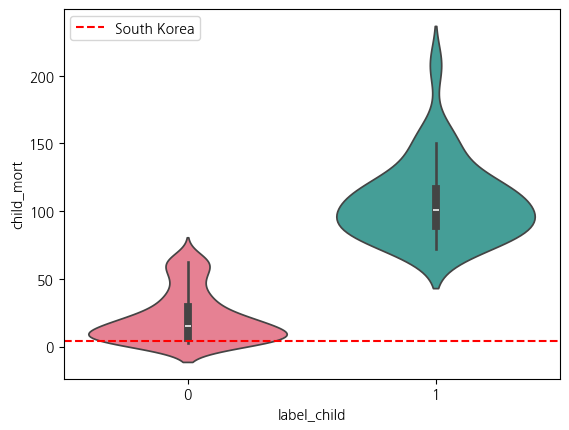

In [24]:
unique_labels = country_df["label_child"].unique()
palette = sns.color_palette("husl", len(unique_labels))
sns.violinplot(
    x = "label_child",
    y = "child_mort",
    data = country_df,
    palette = palette)
plt.axhline(4.1, color = "red", linestyle = "--", label = "South Korea")
plt.legend()

#### 1000명당 아동 사망률은
label_baby0이 0~50명사이

label_baby1이 50~150명 사이가 많았다

### 한국은 아동사망률과 출산율이 낮고 기대수명이 높은 label_baby 0국가에 속한 것으로 확인되었다

### 개인 gdpp와 income과 label_baby와의 관계

Text(0.5, 1.0, 'gdpp 히스토그램')

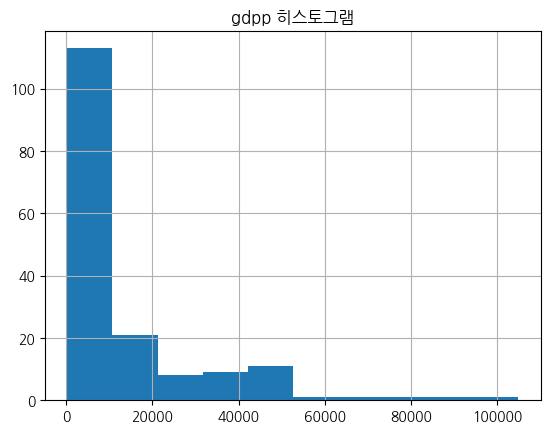

In [25]:
country_df["gdpp"].hist()
plt.title("gdpp 히스토그램")

In [26]:
country_df["log_gdpp"] = np.log(country_df['gdpp'])

Text(0.5, 1.0, '로그화한 gdpp')

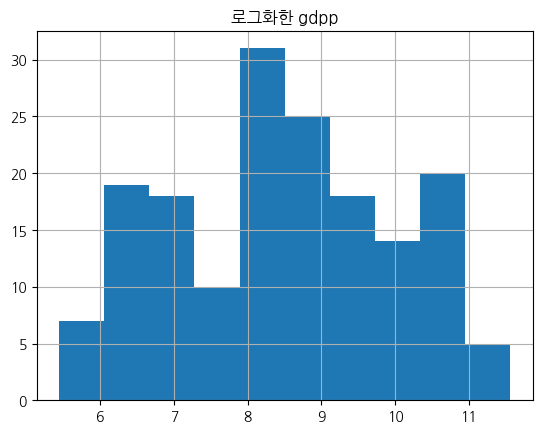

In [27]:
country_df["log_gdpp"].hist()
plt.title("로그화한 gdpp")

In [28]:
South_Korea(country_df, "log_gdpp")

,country,log_gdpp
138,South Korea,10.003333


/var/folders/yd/plqzt5cj0m5blbgycq9b7d_40000gn/T/ipykernel_5145/1655598562.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


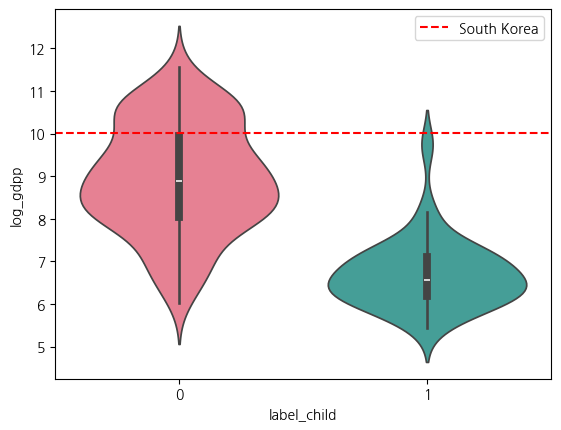

In [29]:
unique_labels = country_df["label_child"].unique()
palette = sns.color_palette("husl", len(unique_labels))
sns.violinplot(
    x = "label_child",
    y = "log_gdpp",
    data = country_df,
    palette = palette)
plt.axhline(10.003333, color = "red", linestyle = "--", label = "South Korea")
plt.legend()

/var/folders/yd/plqzt5cj0m5blbgycq9b7d_40000gn/T/ipykernel_5145/1710731577.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


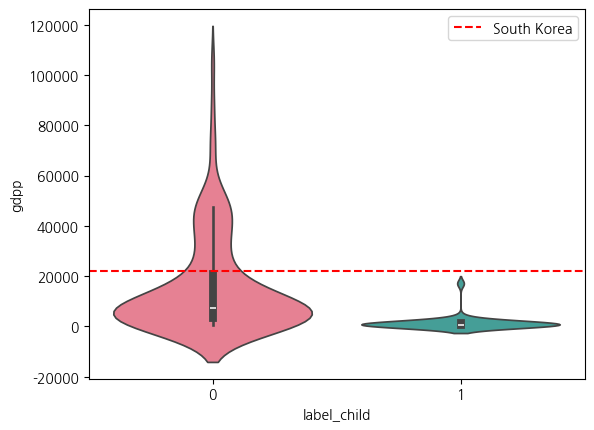

In [30]:
unique_labels = country_df["label_child"].unique()
palette = sns.color_palette("husl", len(unique_labels))
sns.violinplot(
    x = "label_child",
    y = "gdpp",
    data = country_df,
    palette = palette)
plt.axhline(22100.0, color = "red", linestyle = "--", label = "South Korea")
plt.legend()

In [31]:
country_df.groupby('label_child')['gdpp'].describe()

,count,mean,std,min,25%,50%,75%,max
label_child,,,,,,,,
0,134.0,15815.649254,19386.116272,413.0,3137.5,7190.0,21000.0,105000.0
1,33.0,1385.363636,2895.047202,231.0,488.0,702.0,1200.0,17100.0


In [32]:
South_Korea(country_df, "gdpp")

,country,gdpp
138,South Korea,22100.0


Text(0.5, 1.0, 'income 히스토그램')

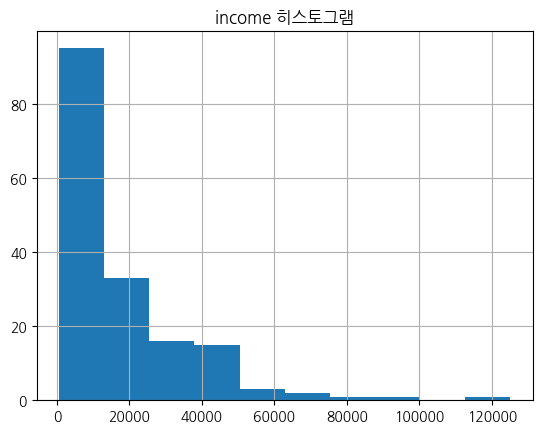

In [33]:
country_df['income'].hist()
plt.title("income 히스토그램")

In [34]:
country_df['log_income'] = np.log(country_df['income'])

Text(0.5, 1.0, '로그화한 income')

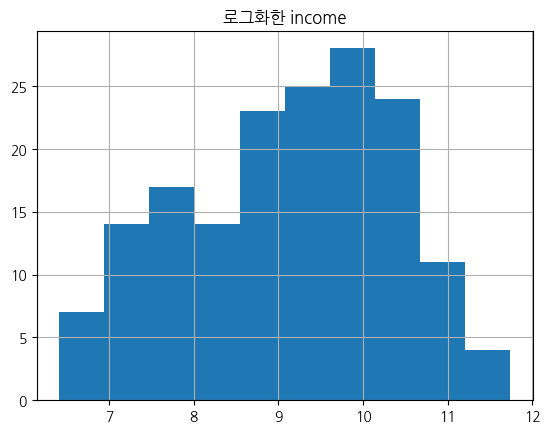

In [35]:
country_df['log_income'].hist()
plt.title("로그화한 income")

In [36]:
South_Korea(country_df,'log_income')

,country,log_income
138,South Korea,10.322198


/var/folders/yd/plqzt5cj0m5blbgycq9b7d_40000gn/T/ipykernel_5145/1770284302.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


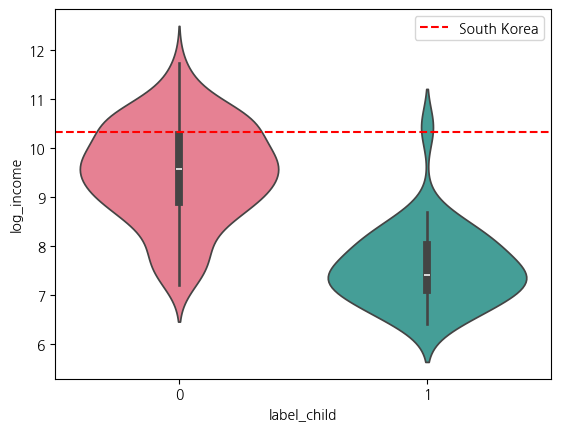

In [37]:
unique_labels = country_df["label_child"].unique()
palette = sns.color_palette("husl", len(unique_labels))
sns.violinplot(
    x = "label_child",
    y = "log_income",
    data = country_df,
    palette = palette)
plt.axhline(10.322198, color = "red", linestyle = "--", label = "South Korea")
plt.legend()

/var/folders/yd/plqzt5cj0m5blbgycq9b7d_40000gn/T/ipykernel_5145/1079456810.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


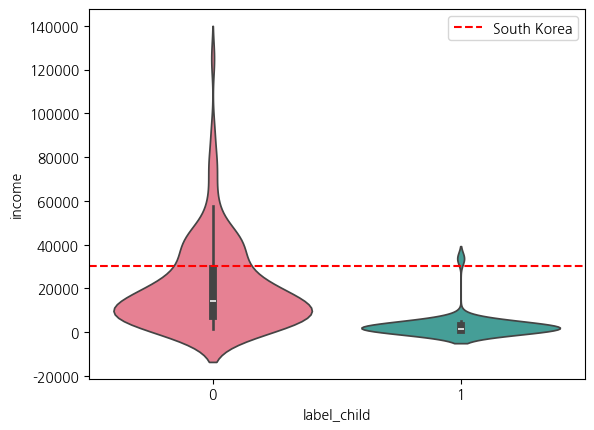

In [38]:
unique_labels = country_df["label_child"].unique()
palette = sns.color_palette("husl", len(unique_labels))
sns.violinplot(
    x = "label_child",
    y = "income",
    data = country_df,
    palette = palette)
plt.axhline(30400.0, color = "red", linestyle = "--", label = "South Korea")
plt.legend()

#### 아동사망률이 높고 아이를 많이 낳는 국가의 경우 개인 gdpp와 income이 낮은 경우를 보였다.

### 한국보다 income이 높은 국가들 중 비교적 출산률이 높은 label_baby 1에 속하는 집단을 보았다.
가설 1. 이 국가들은 비교적 국민 수준이 경제적 수준이 높은데 아이들을 많이 낳지 않을까?

In [39]:
country_df[(country_df['label_child'] == 1)&(country_df['income'] >= 30400.0)][['country','child_mort','income', 'life_expec','total_fer','gdpp']]

,country,child_mort,income,life_expec,total_fer,gdpp
49,Equatorial Guinea,111.0,33700.0,60.9,5.21,17100.0


### 그렇지 않았다, 석유 수출국가로 석유에 많이 의존하는 형태라 수출수입량이 많았으나 아동사망률이 25배이상 많았고 평균수명도 비교적 적었다. 개인 income이 한국보다 높았지만 이점은 빈부격차 비교적 커서 나타난 경향으로 국민들 대부분인 우리나라보다 가난하였다. 경제적으로 가난한 나라일수록 출산율이 더 높은 경향이 있다는 점은 변하지 않았다.

In [40]:
country_df[country_df['country'] == 'South Korea'][['country','child_mort','income', 'life_expec','total_fer','gdpp','exports','imports']]

,country,child_mort,income,life_expec,total_fer,gdpp,exports,imports
138,South Korea,4.1,30400.0,80.1,1.23,22100.0,49.4,46.2


# 같은 label0 국가내에서 한국보다 개인 경제수준이 높은데 출산율도 높은 국가들을 살펴보는게 어떨까?

In [41]:
country_child0 = country_df[country_df['label_child']== 0].copy()

In [42]:
country_child0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 1 to 165
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      134 non-null    object 
 1   child_mort   134 non-null    float64
 2   exports      134 non-null    float64
 3   health       134 non-null    float64
 4   imports      134 non-null    float64
 5   income       134 non-null    float64
 6   inflation    134 non-null    float64
 7   life_expec   134 non-null    float64
 8   total_fer    134 non-null    float64
 9   gdpp         134 non-null    float64
 10  region_1     134 non-null    object 
 11  region_2     37 non-null     object 
 12  continent    134 non-null    object 
 13  latitude     134 non-null    float64
 14  longitude    134 non-null    float64
 15  label_child  134 non-null    int64  
 16  log_gdpp     134 non-null    float64
 17  log_income   134 non-null    float64
dtypes: float64(13), int64(1), object(4)
memory usage: 

# 여기 국가들로만 다시 clustering을 해보았다.

In [43]:
country_child0.corr(numeric_only= True)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,latitude,longitude,label_child,log_gdpp,log_income
child_mort,1.000000,-0.301962,-0.343595,-0.175375,-0.561722,0.301258,-0.829033,0.774009,-0.550915,-0.421184,0.091307,NaN,-0.759810,-0.768657
exports,-0.301962,1.000000,-0.120685,0.785942,0.473270,-0.143679,0.237417,-0.263631,0.375288,0.151128,0.139846,NaN,0.381196,0.440666
health,-0.343595,-0.120685,1.000000,0.044591,0.131880,-0.358728,0.336815,-0.245168,0.378367,0.236525,-0.226788,NaN,0.380271,0.223160
imports,-0.175375,0.785942,0.044591,1.000000,0.105892,-0.274793,0.046512,-0.135388,0.100929,0.085291,0.046943,NaN,0.060509,0.050485
income,-0.561722,0.473270,0.131880,0.105892,1.000000,-0.151695,0.608096,-0.415317,0.884222,0.301281,0.053261,NaN,0.826466,0.851733
inflation,0.301258,-0.143679,-0.358728,-0.274793,-0.151695,1.000000,-0.302962,0.331280,-0.270314,-0.137894,0.164642,NaN,-0.284449,-0.203259
life_expec,-0.829033,0.237417,0.336815,0.046512,0.608096,-0.302962,1.000000,-0.648060,0.638309,0.404632,-0.135939,NaN,0.753055,0.744720
total_fer,0.774009,-0.263631,-0.245168,-0.135388,-0.415317,0.331280,-0.648060,1.000000,-0.391547,-0.472461,-0.006674,NaN,-0.575176,-0.642993
gdpp,-0.550915,0.375288,0.378367,0.100929,0.884222,-0.270314,0.638309,-0.391547,1.000000,0.359632,-0.014209,NaN,0.842871,0.775996
latitude,-0.421184,0.151128,0.236525,0.085291,0.301281,-0.137894,0.404632,-0.472461,0.359632,1.000000,0.068249,NaN,0.331159,0.368354


In [44]:
fertility_economy_col = country_child0[['total_fer','gdpp','income']].reset_index(drop=True)

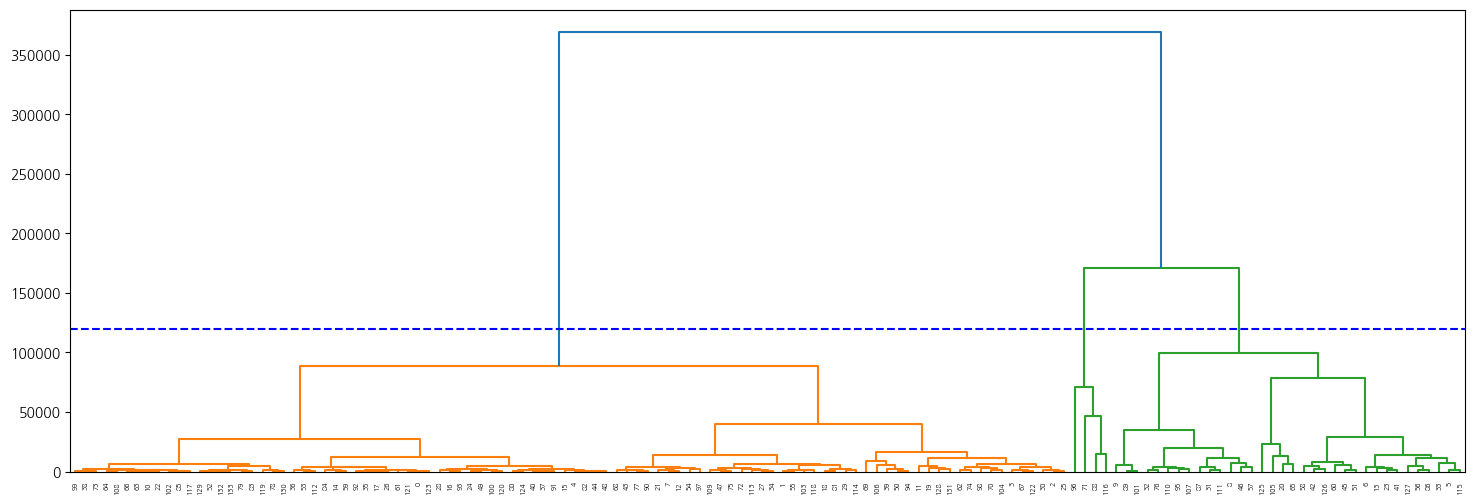

In [45]:
plt.figure(figsize=(18,6))
_=hc.dendrogram(
    hc.linkage(fertility_economy_col, method="ward"))
plt.axhline(120000, color = "blue", linestyle = "--")

Text(0.5, 1.0, '군집 개수별 실루엣 계수')

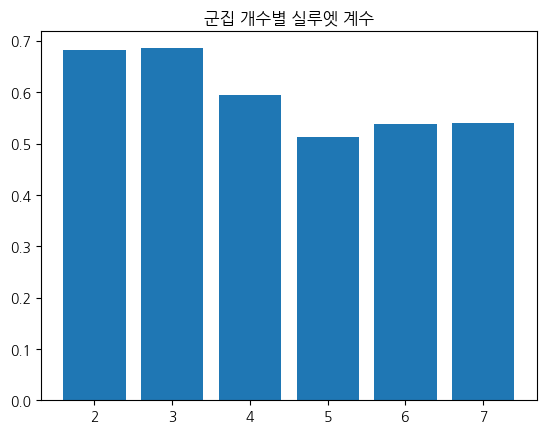

In [46]:
silhouette_scores = []
for i in range(2, 8):
    silhouette_scores.append(
        silhouette_score(fertility_economy_col, AgglomerativeClustering(n_clusters = i).fit_predict(fertility_economy_col)))
plt.bar(range(2,8), silhouette_scores)
plt.title("군집 개수별 실루엣 계수")

In [47]:
model = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage ="ward")
country_child0["label_fertility_economy"] = model.fit_predict(fertility_economy_col)

In [48]:
South_Korea(country_child0,"label_fertility_economy")

,country,label_fertility_economy
138,South Korea,0


In [49]:
South_Korea(country_child0,"total_fer")

,country,total_fer
138,South Korea,1.23


/var/folders/yd/plqzt5cj0m5blbgycq9b7d_40000gn/T/ipykernel_5145/776728116.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


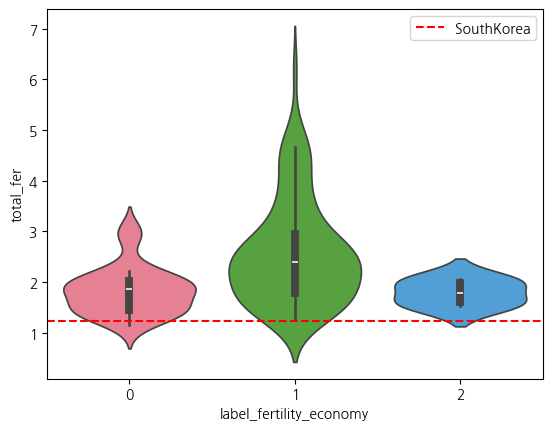

In [50]:
unique_labels = country_child0["label_fertility_economy"].unique()
palette = sns.color_palette("husl", len(unique_labels))
sns.violinplot(
    x = "label_fertility_economy",
    y = "total_fer",
    data = country_child0,
    palette = palette)
plt.axhline(1.23, color = "red", linestyle = "--", label ="SouthKorea")
plt.legend()

In [51]:
South_Korea(country_child0,"gdpp")

,country,gdpp
138,South Korea,22100.0


/var/folders/yd/plqzt5cj0m5blbgycq9b7d_40000gn/T/ipykernel_5145/1506890979.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


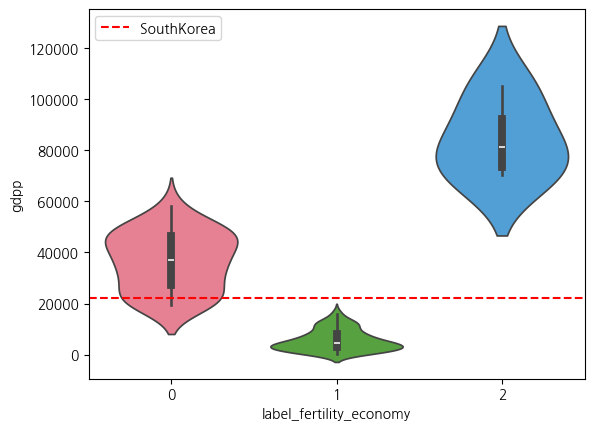

In [52]:
unique_labels = country_child0["label_fertility_economy"].unique()
palette = sns.color_palette("husl", len(unique_labels))
sns.violinplot(
    x = "label_fertility_economy",
    y = "gdpp",
    data = country_child0,
    palette = palette)
plt.axhline(22100.0, color = "red", linestyle = "--", label ="SouthKorea")
plt.legend()

In [53]:
South_Korea(country_child0,"income")

,country,income
138,South Korea,30400.0


/var/folders/yd/plqzt5cj0m5blbgycq9b7d_40000gn/T/ipykernel_5145/1717338950.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


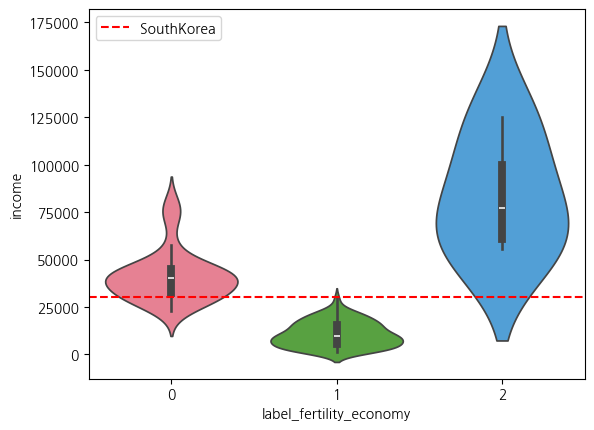

In [54]:
unique_labels = country_child0["label_fertility_economy"].unique()
palette = sns.color_palette("husl", len(unique_labels))
sns.violinplot(
    x = "label_fertility_economy",
    y = "income",
    data = country_child0,
    palette = palette)
plt.axhline(30400.0, color = "red", linestyle = "--", label ="SouthKorea")
plt.legend()

# label2그룹에 속한 나라들을 살펴보자

In [55]:
fecility_economy2 = country_child0[country_child0['label_fertility_economy'] == 2]

In [59]:
fecility_economy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 91 to 145
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  4 non-null      object 
 1   child_mort               4 non-null      float64
 2   exports                  4 non-null      float64
 3   health                   4 non-null      float64
 4   imports                  4 non-null      float64
 5   income                   4 non-null      float64
 6   inflation                4 non-null      float64
 7   life_expec               4 non-null      float64
 8   total_fer                4 non-null      float64
 9   gdpp                     4 non-null      float64
 10  region_1                 4 non-null      object 
 11  region_2                 0 non-null      object 
 12  continent                4 non-null      object 
 13  latitude                 4 non-null      float64
 14  longitude                4 

In [60]:
fecility_economy2[['country','latitude','longitude']]

,country,latitude,longitude
91,Luxembourg,49.815273,6.129583
114,Norway,60.472024,8.468946
123,Qatar,25.354826,51.183884
145,Switzerland,46.818188,8.227512


In [83]:
def make_map(df):
    map_center = [df['latitude'].mean(), df['longitude'].mean()]
    map = folium.Map(location = map_center, zoom_start = 4)
    for i in range(len(df)):
        row = df.iloc[i]
        name = row["country"]
        latitude = row["latitude"]
        logtitude = row["longitude"]
        folium.Marker([latitude, logtitude],popup = name).add_to(map)
    return map

In [84]:
make_map(fecility_economy2)

## 네나라모두 자원이 풍부하거나 글로벌 금융 서비스에서 경제적 강국을 이루고 있음, 대비 우리나라는 그런게 없음

# label0 그룹에 속한 나라들을 살펴보자

In [85]:
fecility_economy0 = country_child0[country_child0['label_fertility_economy'] == 0].copy()

In [86]:
fecility_economy0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 7 to 159
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  34 non-null     object 
 1   child_mort               34 non-null     float64
 2   exports                  34 non-null     float64
 3   health                   34 non-null     float64
 4   imports                  34 non-null     float64
 5   income                   34 non-null     float64
 6   inflation                34 non-null     float64
 7   life_expec               34 non-null     float64
 8   total_fer                34 non-null     float64
 9   gdpp                     34 non-null     float64
 10  region_1                 34 non-null     object 
 11  region_2                 1 non-null      object 
 12  continent                34 non-null     object 
 13  latitude                 34 non-null     float64
 14  longitude                34

In [87]:
fecility_economy0.corr(numeric_only=True)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,latitude,longitude,label_child,log_gdpp,log_income,label_fertility_economy
child_mort,1.000000,0.015128,-0.488491,-0.132555,0.292860,0.747827,-0.830858,0.543102,-0.387963,-0.356882,-0.017057,NaN,-0.397028,0.244045,NaN
exports,0.015128,1.000000,-0.426117,0.951442,0.405295,0.107464,-0.022716,-0.161232,-0.050624,-0.099379,0.158283,NaN,-0.077141,0.363227,NaN
health,-0.488491,-0.426117,1.000000,-0.237398,-0.446742,-0.658331,0.438790,-0.270337,0.438866,0.374014,-0.496239,NaN,0.429897,-0.374523,NaN
imports,-0.132555,0.951442,-0.237398,1.000000,0.155918,-0.118927,0.082598,-0.301810,-0.062350,-0.025633,0.048241,NaN,-0.087431,0.119050,NaN
income,0.292860,0.405295,-0.446742,0.155918,1.000000,0.539060,-0.124851,0.125876,0.355630,-0.234172,0.237173,NaN,0.361725,0.980978,NaN
inflation,0.747827,0.107464,-0.658331,-0.118927,0.539060,1.000000,-0.591963,0.546397,-0.324055,-0.312236,0.253492,NaN,-0.333303,0.525175,NaN
life_expec,-0.830858,-0.022716,0.438790,0.082598,-0.124851,-0.591963,1.000000,-0.382935,0.505062,0.124421,0.138784,NaN,0.529467,-0.072793,NaN
total_fer,0.543102,-0.161232,-0.270337,-0.301810,0.125876,0.546397,-0.382935,1.000000,-0.105855,-0.157747,0.014425,NaN,-0.126189,0.168306,NaN
gdpp,-0.387963,-0.050624,0.438866,-0.062350,0.355630,-0.324055,0.505062,-0.105855,1.000000,0.177129,-0.118512,NaN,0.990339,0.440475,NaN
latitude,-0.356882,-0.099379,0.374014,-0.025633,-0.234172,-0.312236,0.124421,-0.157747,0.177129,1.000000,-0.670072,NaN,0.159139,-0.176458,NaN


In [88]:
make_map(fecility_economy0)

In [63]:
fecility_economy0[fecility_economy0['country'] == 'South Korea']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,region_1,region_2,continent,latitude,longitude,label_child,log_gdpp,log_income,label_fertility_economy
138,South Korea,4.1,49.4,6.93,46.2,30400.0,3.16,80.1,1.23,22100.0,Eastern Asia,NaN,Asia,35.907757,127.766922,0,10.003333,10.322198,0


<Axes: xlabel='inflation', ylabel='child_mort'>

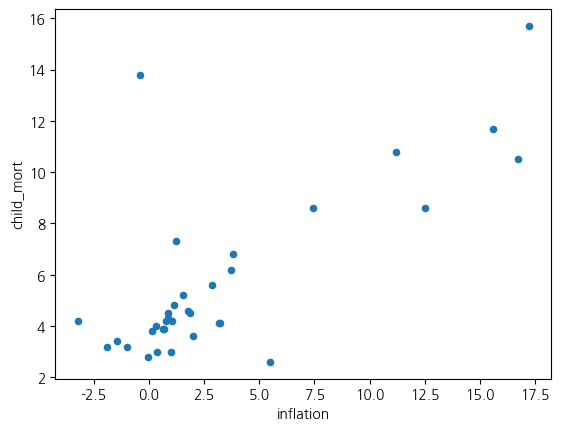

In [64]:
fecility_economy0.plot(
    kind = "scatter",
    x = "inflation",
    y = "child_mort")